В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import beta
import warnings
warnings.filterwarnings("ignore")

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Сквозь муки выбора, непонимания и противоречия библиотек SciPy и данных в википедии.
##### Выбрано Бетта-распределение.
Бета-распределение часто используется для описания процессов, обладающих естественными нижним и верхним пределами. Например, Бета-распределение применяется в методе PERT (Project Evaluation and Review Technique) для оценки продолжительности работ по проекту. Бета-распределение является адекватной моделью для описания доли минералов, содержащихся в горной породе; доли солнечной радиации, поглощенной материалом и др.

##### Функуция распределение случайной величины
$$ f(x) = \dfrac {x^{a-1}(1-x)^{b-1}}{B(a,b)} $$ 
где B(a, b) - бетта-функция
$$B(a,b) = \int_{0}^{1} x^{a-1}(1-x)^{b-1} dx $$
a и b > 0, произвольные фиксированные параметры 

Подробнее можно почитать [тут](https://ru.wikipedia.org/wiki/Бета-распределение) и [тут](https://excel2.ru/articles/beta-raspredelenie-nepreryvnye-raspredeleniya-v-ms-excel)

##### Матожидание и дисперсия
$$ E(X) = \dfrac {a}{a+b}$$

$$ D(X) = \dfrac {ab}{{(a+b)^2}(a+b+1)}$$

##### Реализация

SciPy.stats.beta

### Функция генерирующая выборку согласно бета-распределения из 1000 элементов по заданным параметрам a и b, а так же выводящая гистограмму и график теоретической плотности распределения полученной выборки

In [5]:
## генерируем выборки, рисуем гистограммы
def drowing(a, b):
    beta_dis = beta(a, b)
    sample = beta_dis.rvs(1000) 
    x = np.linspace(0, 1, 1000) # создаем выборку из 1000 элементов
    pdf = beta_dis.pdf(x) # определяем pdf выборки
    plt.hist(sample, normed=True, label='гистограмма выборки') # строим гистограмму выборки
    plt.plot(x, pdf, label='теоретичекая pdf') # строим график теоретической плотности распределения
    tit = 'a = ' + str(a) + ', b = ' + str(b)
    plt.title(tit)
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.grid(True) # сетка на графике
    plt.show()

Рассмотрим разные значения параметров a и b 

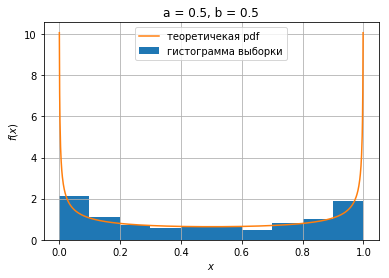

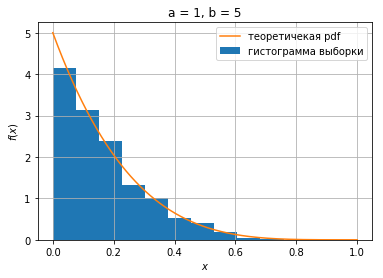

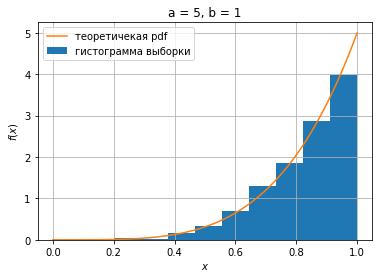

In [6]:
for a, b in [[0.5, 0.5], [1, 5], [5, 1]]:
    drowing(a, b)

###  Функция оценивает распределение выборочного среднего случайной величины при разных объёмах выборок бета-распределения при заданных параметрах a и b. Используя информацию о среднем и дисперсии определяет значения параметров нормальных распределений. Строит гистограммы выборочных средних, поверх каждой гистограммы рисует плотность соответствующего нормального распределения.

In [7]:
def drowing_CPT(a, b):
    for n in [5, 10, 50]:
        beta_dis = beta(a, b)
        # вычисляется среднее из 1000 выборок
        sample_means = []
        for _ in range(1000):
            sample_means.append(beta_dis.rvs(size=n).mean())
        # строим гистограмму выборки    
        plt.hist(sample_means, 20, normed=True, range=[0, 1], facecolor='g', alpha=0.5, label='гистограмма выборочных средних')
        E = a/(a+b) # cчитаем мат.ожидание
        D = (a*b)/((a+b+1)*(a+b)**2) # считаем дисперси.
        # вычисляем pdf плотность нормального распределения
        norm_rv = sts.norm(E, np.sqrt(D/n))
        x = np.linspace(0, 1, 1000)
        pdf = norm_rv.pdf(x)
        #  строим график
        plt.plot(x, pdf, label='pdf нормального распределения')
        plt.legend()
        tit = 'n = {}, D = {}, E = {}, a = {}, b = {}'.format(n, np.round(D, 4), E, a, b)
        plt.title(tit)
        plt.ylabel('Функция распределение плотностй $f(x)$')
        plt.xlabel('Выборочное средне $x$')
        plt.grid(True)
        plt.show()

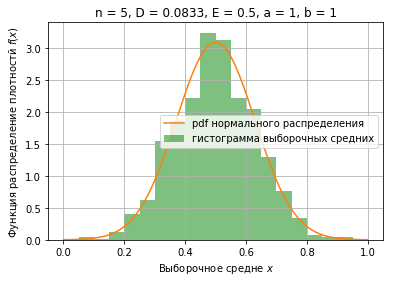

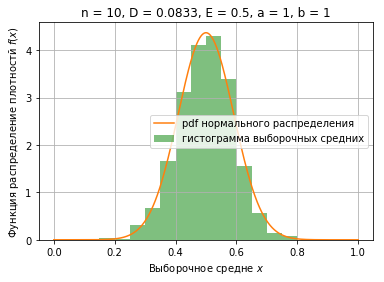

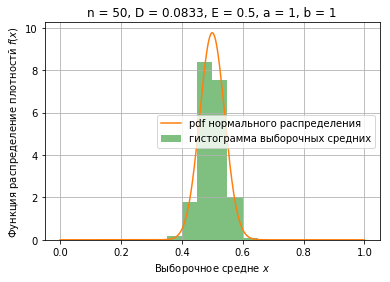

In [8]:
drowing_CPT(1, 1)

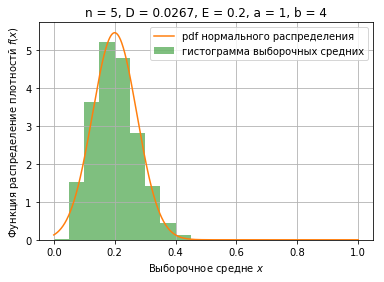

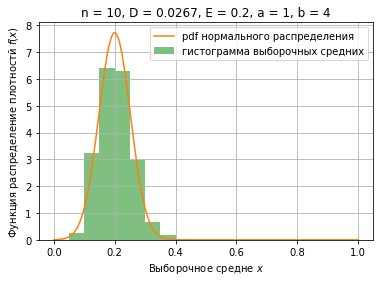

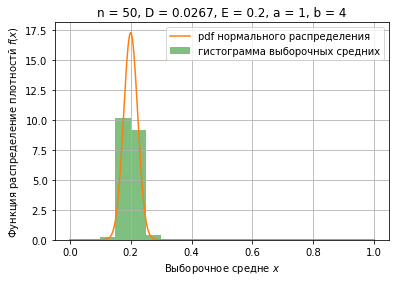

In [9]:
drowing_CPT(1, 4)

По полученным графикам наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой распределением, хотя при значениях параметров a = 1, b = 4, функция нормального распределения принимает большие значения.